Reionisation completed at z~ 5.8


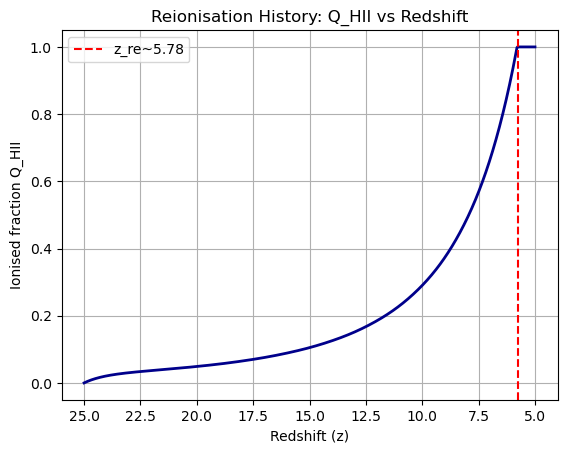

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# --- constants ---
H0 = 67.4 * 1000 / (3.085e22)      # Hubble constant (s^-1)
omega_m = 0.3                      # matter density
omega_l = 0.7                     # dark energy density
alpha_B = 2.6e-13                 # recombination coefficient (cm^3/s)
C =5                         # clumping factor
nH0_cm3 = 2e-7                   # hydrogen number density (cm^-3)
dotn_ion = 7.84e50                # your photon production rate (s^-1 Mpc^-3)
cm_per_Mpc = 3.08e24
nH0_Mpc3 = nH0_cm3 * cm_per_Mpc**3

# --- functions ---
def H(z):
    return H0 * np.sqrt(omega_m*(1+z)**3 + omega_l)

def dQ_dz(z, Q):
    source = dotn_ion / nH0_Mpc3
    recomb = alpha_B * C * nH0_cm3 * (1+z)**3
    return  -(1/((1+z)*H(z))) * (source - recomb * Q)

# --- solve from z=25 → 5 ---
z_span = (25,5)
z_eval = np.linspace(z_span[0], z_span[1], 800)
sol = solve_ivp(dQ_dz, z_span, [0], t_eval=z_eval, method='RK45')
sol1=np.clip(sol.y[0], 0, 1)
idx=np.where(sol1 >= 0.99)[0]
if len(idx)>0:
    z_re=z_eval[idx[1]]
    print("Reionisation completed at z~",round(z_re,1))

# --- plot ---
plt.plot(z_eval,sol1 , color='darkblue', lw=2)
plt.axvline(z_re,color='r',linestyle='--',label=f'z_re~{z_re:.2f}')
plt.legend()
plt.xlabel("Redshift (z)")
plt.ylabel("Ionised fraction Q_HII")
plt.gca().invert_xaxis()
plt.title("Reionisation History: Q_HII vs Redshift")
plt.grid(True)
plt.show()

In [3]:
import mpmath as mp
import numpy as np
f_esc=0.02
xi_ion=1e25
delta_c=1.686
alpha=-1.8
s=1.5
sigma_not=1
M_not=1e10
L_not=1e28
rho_not=2e10
term1=(delta_c*rho_not*L_not)/(2*sigma_not*M_not)
term2=(-delta_c**2/2*sigma_not**2)**(-(s-1+alpha)/(2*s))
term3=mp.gamma((s-1-alpha)/(2*s))

n_ion=mp.re(f_esc*xi_ion*np.sqrt(2/np.pi)*term1*term2*term3)
print("number of ions",n_ion)

number of ions 7.84234142508366e+50
